# Библиотеки и CUDA

In [16]:
# обработка ошибок и предупреждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
# вывод всех графиков и прочих картинок в самом файле .ipynb
%matplotlib inline

In [20]:
# для работы с данными в формате DataFrame (анализ; подготовка набора данных)
import pandas as pd 
import librosa # библиотека для работы с аудиофайлами
import os # для работы с файлами; системой
import matplotlib.pyplot as plt # графики; визуализация
import numpy as np # для работы с данными

# Модуль А. Анализ и предобработка данных

## Анализ данных

### Датасет LJSpeech-1.1

*Исходные данные представлены в папке "LJSpeech-1.1". В ней содержатся следующие файлы:*

* Файл "metadata.csv", в котором хранятся тексты 

* Файл README с описанием набора данных

* Папка "wavs", в которой хранятся аудиофайлы в формате .wav с голосовой записью текстов из "metadata.csv".  *Каждому аудиофайлу соответствует текст с таким же значением в первой колонке в файле .csv*

____

Для анализа файла "metadata.csv" я сделаю из него датафрейм с помощью библиотеки pandas и буду анализировать так же с помощью методов из этой библиотеки

*ps: датафрейм где-то будет сокращён до дф*

In [13]:
# создаём дф
df_ishod = pd.read_csv(r'LJSpeech-1.1\metadata.csv', sep = '|', header=None)
df_ishod # вывод дф

,0,1,2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...


В первой колонке датафрейма хранятся названия файлов из папки "wavs", во второй и третьей колонках - тексты из аудиофайлов.

Называем колонки в датафрейме в соответствии с тем, какая информация в них есть:

In [14]:
df_ishod.columns = ['file_name', 'text1', 'text2'] # добавляем колонки
df_ishod # выводим дф

,file_name,text1,text2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...


В датафрейме 13100 строчек, столько же, сколько и аудиофайлов.

* В первую очередь посмотрим, отличаются ли тексты в колонках text1 и text2

In [ ]:
list_dub = [] # список для индексов строк с разными текстами в колонках

# проходимся по всем строчкам в дф
for i in range(len(df_ishod)):
    # проверяем равны ли данные
    if df_ishod['text1'].iloc[i] != df_ishod['text2'].iloc[i]:
        print(i) # если нет, то выводим индекс строки
        list_dub.append(i) # и добавляем его в список list_dub

print(f'Количество строк с неодинаковыми текстами: {len(list_dub)}\nИндексы строк с неодинаковыми текстами: {list_dub}')

6
23
30
33
37
44
48
76
90
91
92
121
186
193
194
195
196
198
199
200
201
205
206
207
209
210
211
214
215
217
218
219
220
221
233
237
240
247
263
274
302
303
304
306
308
309
310
311
313
314
321
323
331
332
335
338
339
340
341
342
343
344
348
360
361
363
378
383
399
409
424
425
427
430
432
448
451
452
454
456
476
482
488
498
508
523
557
558
565
572
573
574
576
577
593
596
665
699
715
717
745
798
809
810
816
871
881
894
896
908
945
948
954
959
961
972
973
976
980
981
989
1014
1021
1022
1056
1084
1097
1111
1118
1119
1120
1130
1147
1149
1176
1192
1193
1194
1196
1203
1252
1253
1256
1259
1260
1264
1285
1305
1319
1334
1338
1343
1359
1361
1368
1369
1371
1374
1400
1405
1419
1425
1426
1500
1537
1538
1539
1655
1726
1803
1824
1825
1853
1856
1868
1907
1929
1933
1935
1939
1949
1968
1969
1978
1981
1984
1987
1988
1990
1998
2004
2018
2042
2061
2112
2117
2119
2124
2149
2154
2158
2163
2165
2233
2287
2317
2446
2453
2455
2456
2458
2459
2460
2461
2462
2464
2465
2474
2475
2483
2488
2503
2535
2553
2570
2586
259

In [ ]:
df_dub = pd.DataFrame(columns=['file_name', 'text1', 'text2']) # дф для строк с разными текстами
# проходимся по всем строкам
for i in range(len(df_ishod)):
    # если индекс есть в листе, то добавляем соответствующую строку в df_dub
    if i in list_dub:
        df_dub = pd.concat([df_dub, df_ishod.loc[[i]]], ignore_index=True)

df_dub # выводим дф

,file_name,text1,text2
0,LJ001-0007,"the earliest book printed with movable types, ...","the earliest book printed with movable types, ..."
1,LJ001-0024,But the first Bible actually dated (which also...,But the first Bible actually dated (which also...
2,LJ001-0031,In 1465 Sweynheim and Pannartz began printing ...,In fourteen sixty-five Sweynheim and Pannartz ...
3,LJ001-0034,"They printed very few books in this type, thre...","They printed very few books in this type, thre..."
4,LJ001-0038,while in 1470 at Paris Udalric Gering and his ...,while in fourteen seventy at Paris Udalric Ger...
...,...,...,...
1516,LJ050-0236,"Thus, in the 4 months following the assassinat...","Thus, in the four months following the assassi..."
1517,LJ050-0237,"the FBI, on 16 separate occasions, supplied a ...","the FBI, on sixteen separate occasions, suppli..."
1518,LJ050-0239,"From February 11 through June 30, 1964,","From February eleven through June thirty, nine..."
1519,LJ050-0240,"the Service had the advantage of 9,500 hours o...",the Service had the advantage of nine thousand...


* Отличия в текстах по колонкам text1 и text2 заключаются в том, что в колонке text1 числовые значения записаны цифрами, а в колонке text2 они записаны словами.

_____

Для анализа аудиофайлов я создам датафрейм, в котором будут храниться название аудиофайла и его продолжительность в секундах.

In [8]:
df_audio = pd.DataFrame(columns = ['file_path', 'file_name', 'duration']) # создаём дф

In [9]:
count = 0
for file in os.listdir(r'LJSpeech-1.1\wavs'):
    print(count, file)
    if not file.endswith('.wav'): print(file)
    file_path = os.path.join(r'LJSpeech-1.1\wavs', file)
    audio, sr = librosa.load(file_path, sr = None)
    duration = librosa.get_duration(y = audio, sr = sr)
    count += 1
    df_audio.loc[count] = [file_path, file, duration]

0 LJ001-0001.wav
1 LJ001-0002.wav
2 LJ001-0003.wav
3 LJ001-0004.wav
4 LJ001-0005.wav
5 LJ001-0006.wav
6 LJ001-0007.wav
7 LJ001-0008.wav
8 LJ001-0009.wav
9 LJ001-0010.wav
10 LJ001-0011.wav
11 LJ001-0012.wav
12 LJ001-0013.wav
13 LJ001-0014.wav
14 LJ001-0015.wav
15 LJ001-0016.wav
16 LJ001-0017.wav
17 LJ001-0018.wav
18 LJ001-0019.wav
19 LJ001-0020.wav
20 LJ001-0021.wav
21 LJ001-0022.wav
22 LJ001-0023.wav
23 LJ001-0024.wav
24 LJ001-0025.wav
25 LJ001-0026.wav
26 LJ001-0027.wav
27 LJ001-0028.wav
28 LJ001-0029.wav
29 LJ001-0030.wav
30 LJ001-0031.wav
31 LJ001-0032.wav
32 LJ001-0033.wav
33 LJ001-0034.wav
34 LJ001-0035.wav
35 LJ001-0036.wav
36 LJ001-0037.wav
37 LJ001-0038.wav
38 LJ001-0039.wav
39 LJ001-0040.wav
40 LJ001-0041.wav
41 LJ001-0042.wav
42 LJ001-0043.wav
43 LJ001-0044.wav
44 LJ001-0045.wav
45 LJ001-0046.wav
46 LJ001-0047.wav
47 LJ001-0048.wav
48 LJ001-0049.wav
49 LJ001-0050.wav
50 LJ001-0051.wav
51 LJ001-0052.wav
52 LJ001-0053.wav
53 LJ001-0054.wav
54 LJ001-0055.wav
55 LJ001-0056.wav
56

In [10]:
df_audio

,file_path,file_name,duration
1,LJSpeech-1.1\wavs\LJ001-0001.wav,LJ001-0001.wav,9.655011
2,LJSpeech-1.1\wavs\LJ001-0002.wav,LJ001-0002.wav,1.899546
3,LJSpeech-1.1\wavs\LJ001-0003.wav,LJ001-0003.wav,9.666621
4,LJSpeech-1.1\wavs\LJ001-0004.wav,LJ001-0004.wav,5.138730
5,LJSpeech-1.1\wavs\LJ001-0005.wav,LJ001-0005.wav,8.110884
...,...,...,...
13096,LJSpeech-1.1\wavs\LJ050-0274.wav,LJ050-0274.wav,4.500181
13097,LJSpeech-1.1\wavs\LJ050-0275.wav,LJ050-0275.wav,9.120952
13098,LJSpeech-1.1\wavs\LJ050-0276.wav,LJ050-0276.wav,8.563673
13099,LJSpeech-1.1\wavs\LJ050-0277.wav,LJ050-0277.wav,8.714603


In [11]:
df_audio['duration'].describe()

count    13100.000000
mean         6.573823
std          2.185431
min          1.110068
25%          4.987800
50%          6.764127
75%          8.389524
max         10.096190
Name: duration, dtype: float64

* Минимальное время длительности аудиофайла - 1,1 секунда, максимальная - 10. Разница между значениями по квартилям примерно равномерная

* --> выбросов по длительности аудиофайлов нет

___

пробно визуализирую рандомный аудиофайл ищ набора данных:

***Форма волны (??????)***

* по оси y откладывается амплитуда сигнала, а по оси x - время

In [ ]:
# читаемзагружаем файл
audio_array, sr = librosa.load(r'LJSpeech-1.1\wavs\LJ001-0007.wav', sr = None)

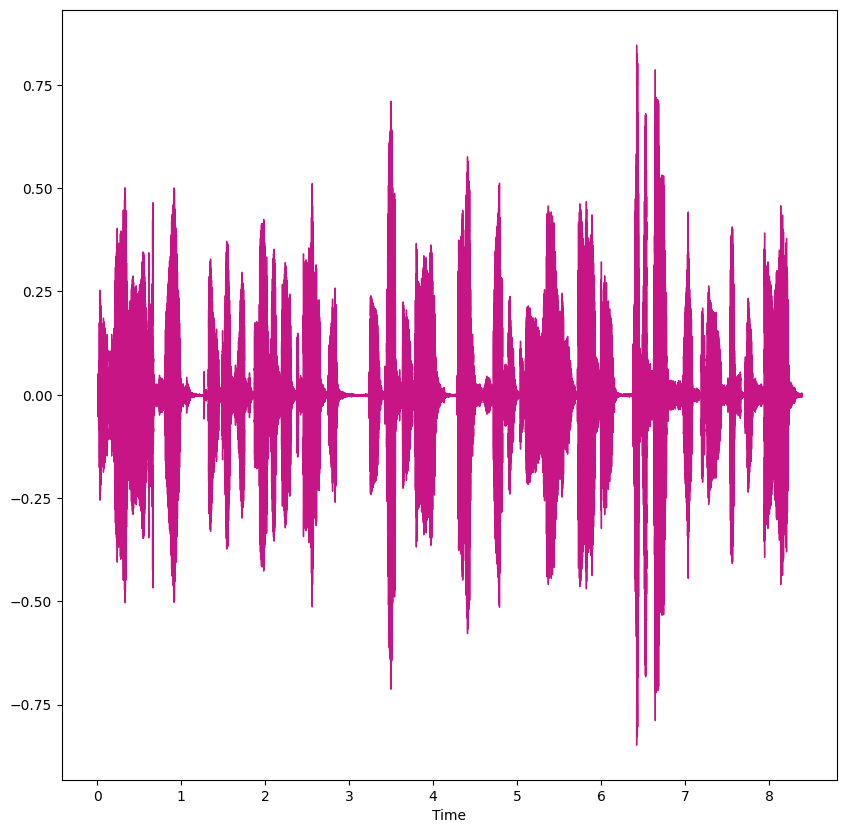

In [25]:
plt.figure(figsize=(10, 10)).set_figwidth # фигура
librosa.display.waveshow(audio_array, sr = sr, color = 'mediumvioletred') # сам график
plt.show() # вывод графика

***Частотный спектр***

* Построение частотного спектра аудиосигнала, также известное как частотный интервал. Спектр вычисляется с помощью Дискретного Преобразования Фурье или ДПФ (Discrete Fourier Transform - DFT). Он описывает отдельные частоты, из которых состоит сигнал, и их силу.

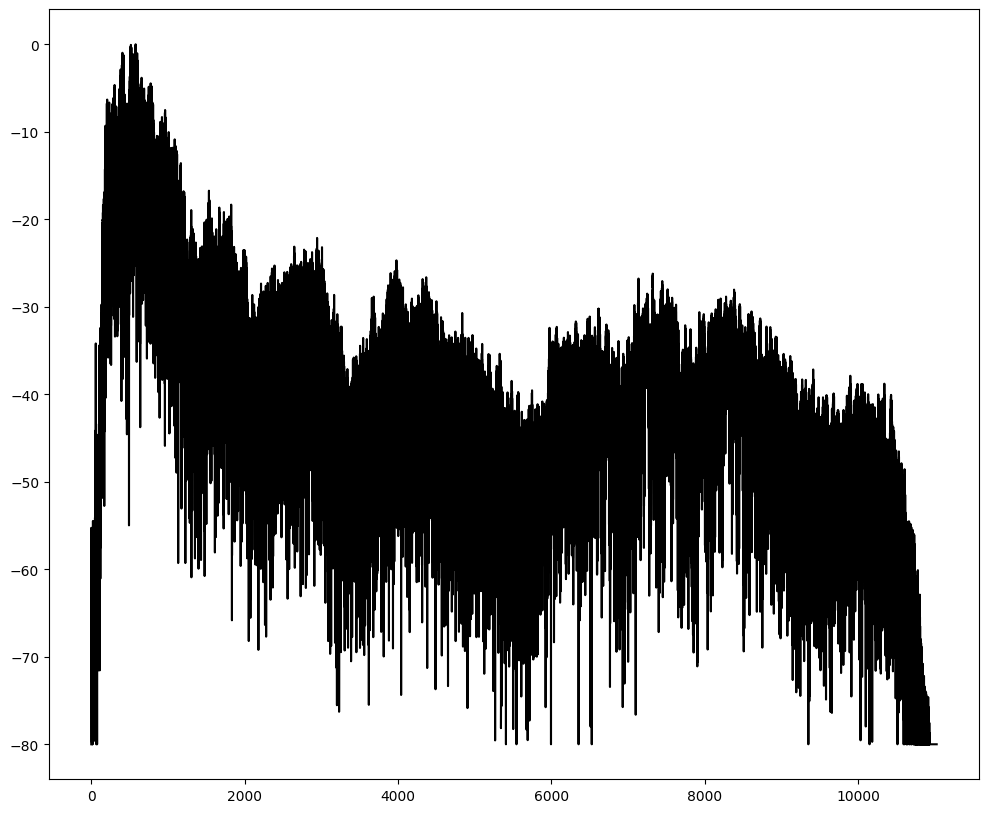

In [ ]:
# рассчёт ДПФ

window = np.hanning(len(audio_array))
windowed_input = audio_array * window
dft = np.fft.rfft(windowed_input)

# получаем амплитудный спектр в децибелах
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref = np.max) # метод для преобразования значений амплитуды в дециб. шкалу

# получаем частотные столбцы 
frequency = librosa.fft_frequencies(sr = sr, n_fft = len(audio_array))

# строим график
plt.figure(figsize=(10, 10)).set_figwidth(12) # фигура
plt.plot(frequency, amplitude_db, color = 'black') # сам график
plt.show() # вывод графика

***Спектрограмма***

* Представляет собой график изменения частотного содержания звукового сигнала во времени. Спектрограмма позволяет увидеть время, частоту, амплитуду на одном графике. 

Алгоритм, выполняющий эти вычисления, называется ОПФ или Оконное Преобразование Фурье (Short Time Fourier Transform - STFT).

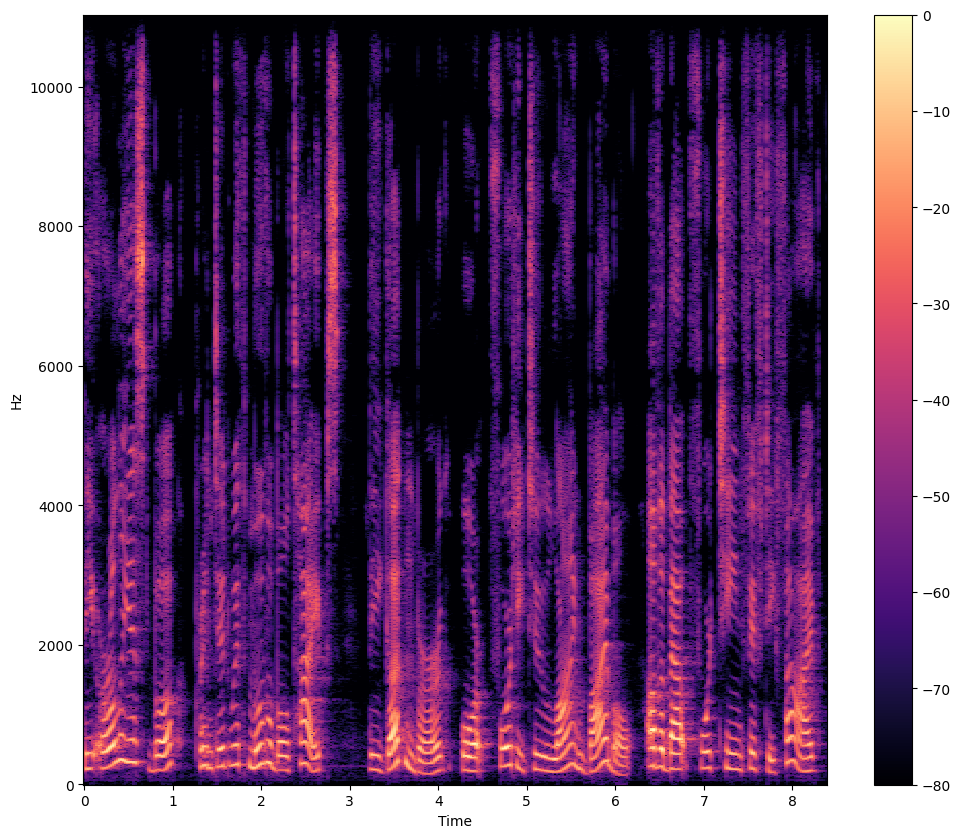

In [24]:
D = librosa.stft(audio_array)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

# построение графика
plt.figure(figsize = (10, 10)).set_figwidth(12)
librosa.display.specshow(S_db, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

На этом графике ось x представляет собой время, как и при визуализации формы волны, но теперь ось y представляет собой частоту в Гц. *Интенсивность цвета показывает амплитуду или мощность частотной составляющей в каждый момент времени, измеряемую в децибелах (дБ)*